# Analisando dados de vendas e clientes de uma empresa de autómoveis

O objetivo deste projeto é conectar o python ao postgreSQL e acessar o banco de dados que contém as tabelas relacionadas a uma empresa de automóveis diretamente do python aqui no jupyter notebook. A ideia é fazer as análises utilizando os códigos do SQL no Python pelo jupyter notebook e as bibliotecas do python. Sendo assim, a filtragem dos dados foi feita utilizando os códigos do  postgreSQL aqui no python e a geração dos gráficos foi feita utilizando as bibliotecas do python. A análise consiste em responder as seguintes perguntas:

**1**. Qual Estado possue mais clientes?

**2**. Qual o status profissional mais frequente dos clientes que compraram automóveis no site?

**3**. Quem compra mais, homens ou mulheres?

**4**. Qual região possui o maior número de clientes que visitam o site da empresa?

**5**. Qual a idade média dos clientes por status profissional?

# 1. Importação das bibliotecas utilizadas ao longo de todo o projeto

In [1]:
import pandas as pd                                   # (Biblioteca que contém os comandos para ler as planilhas)
import numpy as np                                    # (Biblioteca que contém os comandos para realização de cálculos)
import matplotlib.pyplot as plt                       # (Para geração de gráficos)
import statsmodels.formula.api as sm                  # (Para criar o modelo de regressão linear múltipla)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

import psycopg2
#import sqlalchemy import create_engine
from sqlalchemy import create_engine
import sqlite3

# 2. Coleta de dados usando os códigos postgreSQL

## 2.1 Conectando ao banco de dados no postgreSQL 

In [2]:
# Função para criar conexão no banco
def conecta_db():
  con = psycopg2.connect(host='localhost', 
                         database='perfil_leads',
                         user='postgres', 
                         password='12345')
  return con

In [3]:
# Função para consultas no banco
def consultar_db(sql):
  con = conecta_db()
  cur = con.cursor()
  cur.execute(sql)
  recset = cur.fetchall()
  registros = []
  for rec in recset:
    registros.append(rec)
  con.close()
  return registros

## 2.2 Consultando as tabelas existentes no banco de dados no PostegreSQL

### 2.2.1 Tabela com informações dos clientes

#### >>> Informações pessoais dos clientes

In [4]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from sales.customers')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
informacoes_clientes = pd.DataFrame(loja_vendas, columns=['ID do Cliente','CPF','Primeiro nome', 'Último nome','Estado','Cidade','Data de nascimento','Renda','Pontuação','Status profissional','E-mail','Móvel'])
informacoes_clientes

,ID do Cliente,CPF,Primeiro nome,Último nome,Estado,Cidade,Data de nascimento,Renda,Pontuação,Status profissional,E-mail,Móvel
0,73650706FFAE,84932586604,IVONELIA,ARGULINO,SP,SÃO PAULO,1973-01-24,7000,491,clt,ivonelia.argulino265830@gmail.com,69262265830
1,236A739A6063,05912702104,ESTEVANIA,MARTHUS,SP,SÃO PAULO,1969-06-30,5800,376,clt,estevania.marthus204682@gmail.com,40632204682
2,CF2DFCBE74E3,85148454740,CLEUDINE,DUARTE,MG,BELO HORIZONTE,1945-12-25,3190,279,clt,cleudine.duarte661670@gmail.com,81639661670
3,25504A496AEB,12430594512,ADEIZE,LUZILDO,SC,NAVEGANTES,1948-03-25,11000,309,civil_servant,adeize.luzildo797118@gmail.com,21943797118
4,05DE6BCDFEC7,01571615400,SHEYLLA,JESKA,SP,CARAPICUÍBA,1963-10-31,6000,305,clt,sheylla.jeska608366@gmail.com,65148608366
...,...,...,...,...,...,...,...,...,...,...,...,...
25104,2A627F45FEBE,29050871368,LAUDISEIA,DUARTE,SP,SOROCABA,1993-02-07,4200,446,clt,laudiseia.duarte723732@gmail.com,41697723732
25105,8186B0E0AD47,93191882060,FRANCILINO,DUARTE,SP,SÃO PAULO,1994-01-04,4500,442,clt,francilino.duarte240846@gmail.com,25681240846
25106,028608D204D3,56889314686,ADMILDA,DUARTE,MG,BELO HORIZONTE,1982-07-16,6500,388,self_employed,admilda.duarte476782@gmail.com,74256476782
25107,A5E64FD582D6,02741194304,EVANISE,MARTHUS,SP,EMBU DAS ARTES,1996-10-27,9500,915,self_employed,evanise.marthus651450@gmail.com,00615651450


#### >>> Informações de compra dos clientes

In [6]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from sales.funnel')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(loja_vendas, columns=['ID da visita','ID do cliente','ID da loja','ID do produto','Data_de_visita_a_página','Data_que_adicionou_ao_carrinho','Data_inicio_da_compra','Data_de_inicio_da_compra','Data de pagamento','Desconto'])
df_bd.head()

,ID da visita,ID do cliente,ID da loja,ID do produto,Data_de_visita_a_página,Data_que_adicionou_ao_carrinho,Data_inicio_da_compra,Data_de_inicio_da_compra,Data de pagamento,Desconto
0,38836BE8B968,73650706FFAE,BF580E604866,produto001,2021-02-19,2021-02-19,None,None,None,-0.34
1,7FB675C2F431,236A739A6063,F79B06D22BC3,produto002,2021-04-20,None,None,None,None,-0.38
2,B07A4A5759AC,CF2DFCBE74E3,B06DF477008E,produto003,2021-06-25,None,None,None,None,-0.14
3,713A295F9E4C,25504A496AEB,97D85A358174,produto004,2021-06-04,2021-06-04,None,None,None,-0.08
4,D6145FA8A291,05DE6BCDFEC7,BF580E604866,produto005,2021-08-26,None,None,None,None,-0.3


In [9]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from temp_tables.ibge_genders')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(loja_vendas, columns=['Primeiro nome','Gênero'])
df_bd.head(7)

,Primeiro nome,Gênero
0,maiuly,female
1,jesuildo,male
2,geara,female
3,demilda,female
4,aleuda,female
5,tenille,female
6,norberto,male


### 2.2.2 Tabela com informações dos produtos

In [30]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from sales.products')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(loja_vendas, columns=['ID do produto','Marca','Modelo','Ano do modelo','Preço'])
df_bd.head()

,ID do produto,Marca,Modelo,Ano do modelo,Preço
0,produto001,RENAULT,LOGAN,2014,67500
1,produto002,VOLKSWAGEN,GOL,2012,51000
2,produto003,FIAT,PALIO,2016,61500
3,produto004,NISSAN,SENTRA,2012,53850
4,produto005,FIAT,UNO,2015,52500


### 2.2.3 Tabela com informações das lojas

In [31]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from sales.stores')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(loja_vendas, columns=['Nome da loja','CNPJ da loja','ID da loja'])
df_bd.head()

,Nome da loja,CNPJ da loja,ID da loja
0,RONDINELIA HENDRI WALTERCY LTDA,69947176155500,BF580E604866
1,MARIONILSON ELENILCE ANNAIR LTDA,57751318123400,F79B06D22BC3
2,JODINA CARLILI VALDILUCIO LTDA,07763238230760,B06DF477008E
3,GERSIANA WILKLER PAULOROBERTO LTDA,78206840245600,97D85A358174
4,DICIVALDO ROSICLER LISIAN LTDA,10581742244300,71CC76D33BA5


### 2.2.4 Tabela com informações das regiões de vendas

In [34]:
# Realizando a consulta no PostegreSQL
loja_vendas = consultar_db('select * from temp_tables.regions')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
df_bd = pd.DataFrame(loja_vendas, columns=['Cidade','Estado','Região','Tamanho','Código','População'])
df_bd.head()

,Cidade,Estado,Região,Tamanho,Código,População
0,Alta Floresta Doeste,RO,Região Norte,Pequeno II,69,24392
1,Ariquemes,RO,Região Norte,Médio,69,90353
2,Cabixi,RO,Região Norte,Pequeno I,69,6313
3,Cacoal,RO,Região Norte,Médio,69,78574
4,Cerejeiras,RO,Região Norte,Pequeno I,69,17029


# 3. Analisando os dados

**1**. Qual Estado possue mais clientes?

**2**. Qual o status profissional mais frequente dos clientes que compraram automóveis no site?

**3**. Quem compra mais, homens ou mulheres?

**4**. Qual região possui o maior número de clientes que visitam o site da empresa?

**5**. Qual a idade média dos clientes por status profissional?

### 1. Qual Estado possue mais clientes?

In [216]:
# Agrupando quantidade de clientes por Estado usando o group by do PostegreSQL
loja_vendas = consultar_db('select state, count(*) as contagem from sales.customers group by state order by contagem desc')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
clientes_estado = pd.DataFrame(loja_vendas, columns=['Estado','Quantidade'])
clientes_estado.head()

,Estado,Quantidade
0,SP,17864
1,MG,2057
2,SC,1975
3,PR,1021
4,RS,953


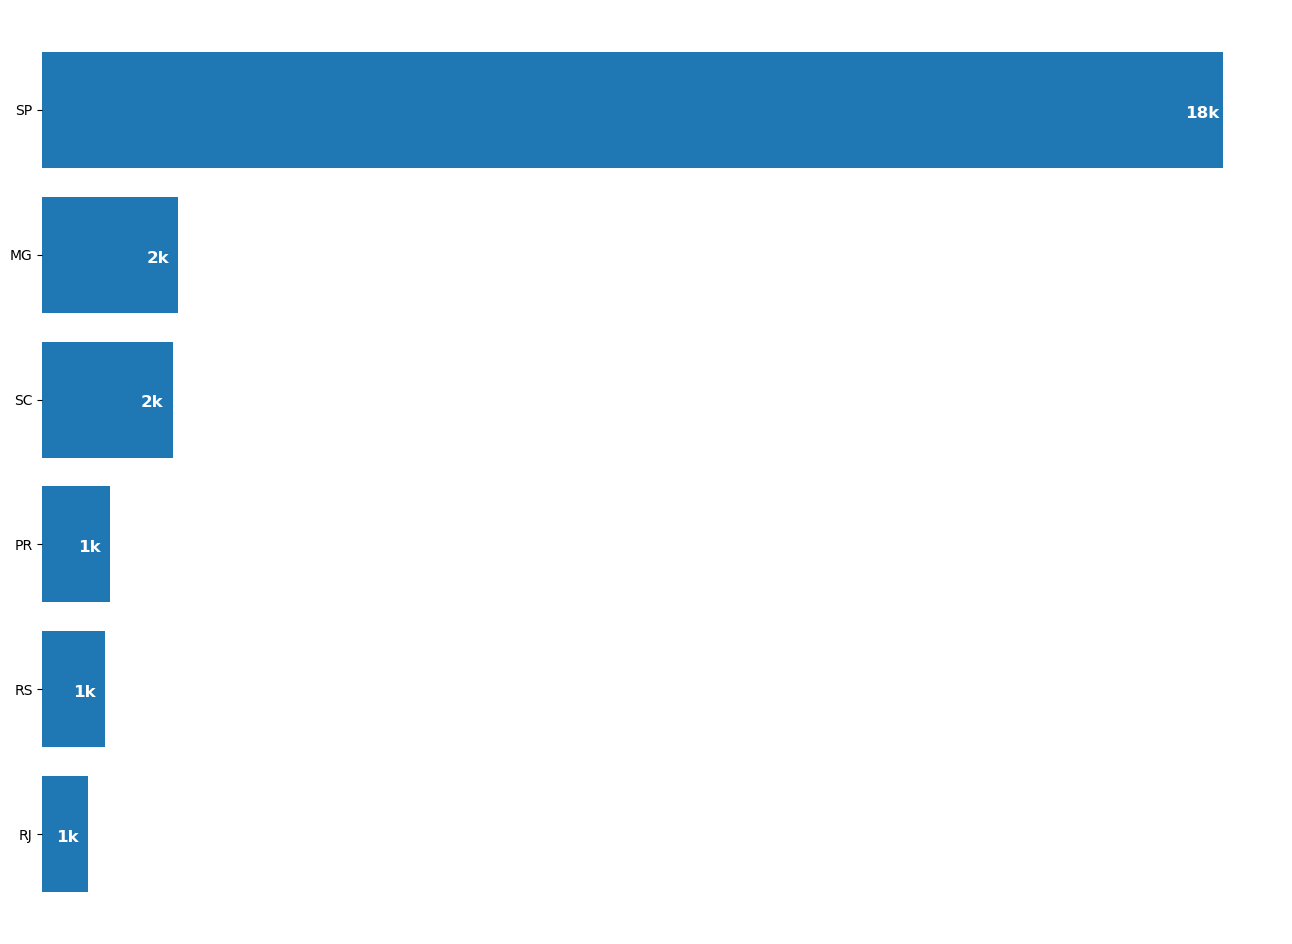

In [215]:
# Vamos traçar um gráfico de barras horizontais para mostrar os 6 estados com maior número de clientes
fig,ax = plt.subplots(
            figsize = (16,12)
        )

ax.barh(clientes_estado['Estado'].values, #Valores de y
        clientes_estado['Contagem'].values, # Valores de x 
        align='center')

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)

for i in np.arange(0,6):
    ax.annotate('{:,.0f}k'.format(clientes_estado['Contagem'].values[i]/1000), 
                (clientes_estado['Contagem'].values[i],i), 
                ha="center", va="top", xytext=(-15,3), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="white")
    
ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

* O Estado com o maior número de clientes é São Paulo com 17864.

### 2. Qual o status profissional mais frequente dos clientes que compraram automóveis no site?

In [217]:
# Agrupando quantidade de clientes por Estado usando o group by do PostegreSQL
loja_vendas = consultar_db('select cus.professional_status, count(fun.paid_date) as pagamentos from sales.funnel as fun left join sales.customers as cus on fun.customer_id = cus.customer_id group by cus.professional_status order by pagamentos desc')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
status_profissional = pd.DataFrame(loja_vendas, columns=['Status profissional','Quantidade'])
status_profissional.head()

,Status profissional,Quantidade
0,clt,2415
1,self_employed,312
2,businessman,305
3,other,293
4,freelancer,215


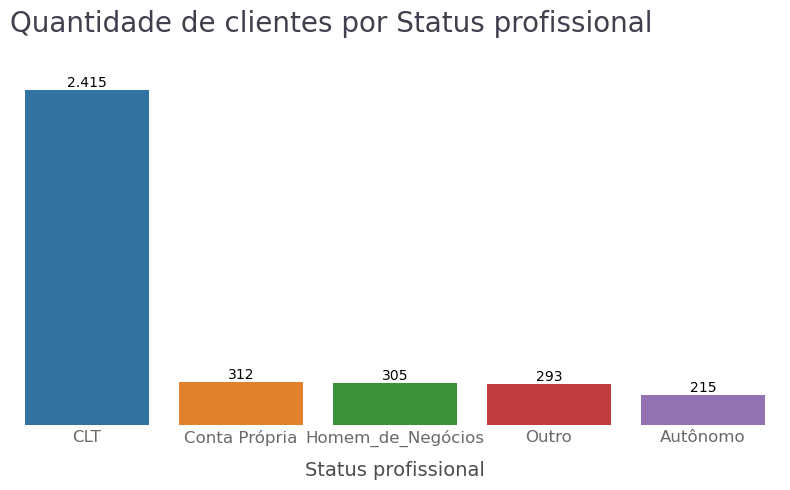

In [219]:
#criando o DataFrame
status_profissional = pd.DataFrame({'Status profissional':['CLT','Conta Própria','Homem_de_Negócios','Outro','Autônomo'], # Nome das frutas
                   'Quantidade':[2415,312,305,293,215]})  # Quantidade de clientes por status profissional

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x='Status profissional',y='Quantidade',data=status_profissional,ax=ax);
ax.set_frame_on(False)
ax.set_title('Quantidade de clientes por Status profissional', # texto do título
             loc='left', # posicionamento do título no Axes
             pad=30, # Distanciamento do título com outros objetos
             fontdict={'fontsize':20}, # Tamanho da fonte utilizado
             color='#3f3f4e') # cor da fonte em hexadecimal

#retirando o eixo y
ax.get_yaxis().set_visible(False) # retirando o eixo Y
#retirando os ticks do eixo x
ax.tick_params(axis='x', # escolhendo os ticks do eixo x
               length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
               labelsize=12, # tamanho da fonte para os eixos
               colors='dimgrey') # cor da fonte para o eixo x
#ajustando o título Regiões do eixo
ax.set_xlabel('Status profissional', # título que queremos colocar na parte horizontal (em baixo)
              labelpad=10, # distanciamento deste título com outros objetos
              fontdict={'fontsize':14}, # tamanho da fonte utilizado
              color='#4c4c4c') # cor da fonte em hexadecimal

#plotando o gráfico
plt.tight_layout();

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

* Os clientes que mais compram são trabalhadores da modalidade CLT.

### 3. Quem compra mais, homens ou mulheres?

In [69]:
# Agrupando quantidade de clientes por Gênero usando o group by do PostegreSQL
loja_vendas = consultar_db('select ibge.gender, count(fun.paid_date) from sales.funnel as fun left join sales.customers as cus on fun.customer_id = cus.customer_id left join temp_tables.ibge_genders as ibge on lower(cus.first_name) = ibge.first_name group by ibge.gender')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
genero = pd.DataFrame(loja_vendas, columns=['Gênero','Contagem'])
genero.head()

,Gênero,Contagem
0,male,1523
1,female,2265


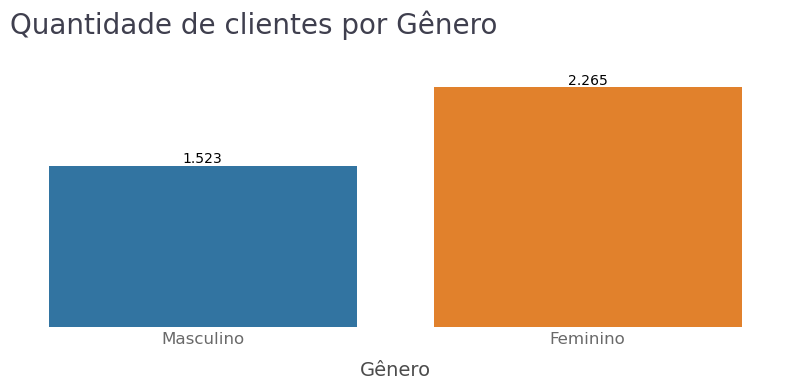

In [214]:
#criando o DataFrame
genero = pd.DataFrame({'Gênero':['Masculino','Feminino'], # Nome das frutas
                   'Quantidade':[1523,2265]})  # Quantidade de clientes por gênero

fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x='Gênero',y='Quantidade',data=genero,ax=ax);
ax.set_frame_on(False)
ax.set_title('Quantidade de clientes por Gênero', # texto do título
             loc='left', # posicionamento do título no Axes
             pad=30, # Distanciamento do título com outros objetos
             fontdict={'fontsize':20}, # Tamanho da fonte utilizado
             color='#3f3f4e') # cor da fonte em hexadecimal

#retirando o eixo y
ax.get_yaxis().set_visible(False) # retirando o eixo Y
#retirando os ticks do eixo x
ax.tick_params(axis='x', # escolhendo os ticks do eixo x
               length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
               labelsize=12, # tamanho da fonte para os eixos
               colors='dimgrey') # cor da fonte para o eixo x
#ajustando o título Regiões do eixo
ax.set_xlabel('Gênero', # título que queremos colocar na parte horizontal (em baixo)
              labelpad=10, # distanciamento deste título com outros objetos
              fontdict={'fontsize':14}, # tamanho da fonte utilizado
              color='#4c4c4c') # cor da fonte em hexadecimal

#plotando o gráfico
plt.tight_layout();

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')


* A maioria dos clientes são do sexo feminino.

### 4. Qual região possui o maior número de clientes que visitam o site da empresa?

In [162]:
# Agrupando quantidade de clientes por Estado usando o group by do PostegreSQL
loja_vendas = consultar_db('select reg.region, count(fun.visit_page_date) as visitas from sales.funnel as fun left join sales.customers as cus on fun.customer_id = cus.customer_id left join temp_tables.regions as reg on lower(cus.city) = lower(reg.city) and lower(cus.state) = lower(reg.state) group by reg.region order by visitas desc')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
clientes_regiao = pd.DataFrame(loja_vendas, columns=['Regiões','Quantidade_visitas'])
clientes_regiao

,Regiões,Quantidade_visitas
0,Região Sudeste,24607
1,Região Sul,4660
2,None,880
3,Região Centro-Oeste,350
4,Região Nordeste,71
5,Região Norte,12


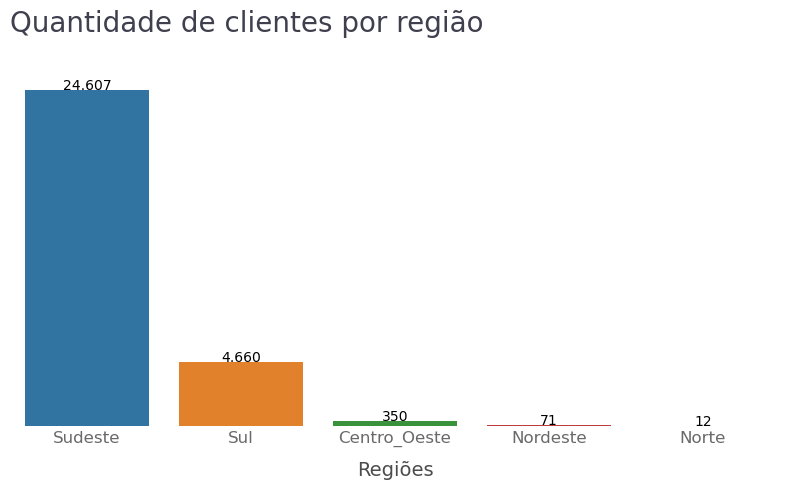

In [202]:
#criando o DataFrame
clientes_regiao1 = pd.DataFrame({'Regiões':['Sudeste','Sul','Centro_Oeste','Nordeste','Norte'], # Nome das frutas
                   'Quantidade_visitas':[24607,4660,350,71,12]})  # Quantidade de clientes por região.

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x='Regiões',y='Quantidade_visitas',data=clientes_regiao1,ax=ax);
ax.set_frame_on(False)
ax.set_title('Quantidade de clientes por região', # texto do título
             loc='left', # posicionamento do título no Axes
             pad=30, # Distanciamento do título com outros objetos
             fontdict={'fontsize':20}, # Tamanho da fonte utilizado
             color='#3f3f4e') # cor da fonte em hexadecimal

#retirando o eixo y
ax.get_yaxis().set_visible(False) # retirando o eixo Y
#retirando os ticks do eixo x
ax.tick_params(axis='x', # escolhendo os ticks do eixo x
               length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
               labelsize=12, # tamanho da fonte para os eixos
               colors='dimgrey') # cor da fonte para o eixo x
#ajustando o título Regiões do eixo
ax.set_xlabel('Regiões', # título que queremos colocar na parte horizontal (em baixo)
              labelpad=10, # distanciamento deste título com outros objetos
              fontdict={'fontsize':14}, # tamanho da fonte utilizado
              color='#4c4c4c') # cor da fonte em hexadecimal

#plotando o gráfico
plt.tight_layout();

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')



* A região que possui o maior número de clientes que visitam o site da empresa é a região Sudeste.

### 5. Qual a idade média dos clientes por status profissional?

In [221]:
# Agrupando quantidade de clientes por Estado usando o group by do PostegreSQL
loja_vendas = consultar_db('with alguma_tabela as (select professional_status, (current_date - birth_date)/365 as idade from sales.customers) select professional_status, avg(idade) as idade_media from alguma_tabela group by professional_status')

# Tranformando os dados da consulta no PostegreSQL em DataFrame
idade_clientes = pd.DataFrame(loja_vendas, columns=['Status profissional','Idade média'])
idade_clientes

,Status profissional,Idade média
0,freelancer,41.2981927710843373
1,retired,57.7392523364485981
2,clt,42.2378733059422334
3,self_employed,44.4969596462133776
4,other,47.5358872743284897
5,businessman,45.0707497360084477
6,civil_servant,46.0326340326340326
7,student,54.0000000000000000


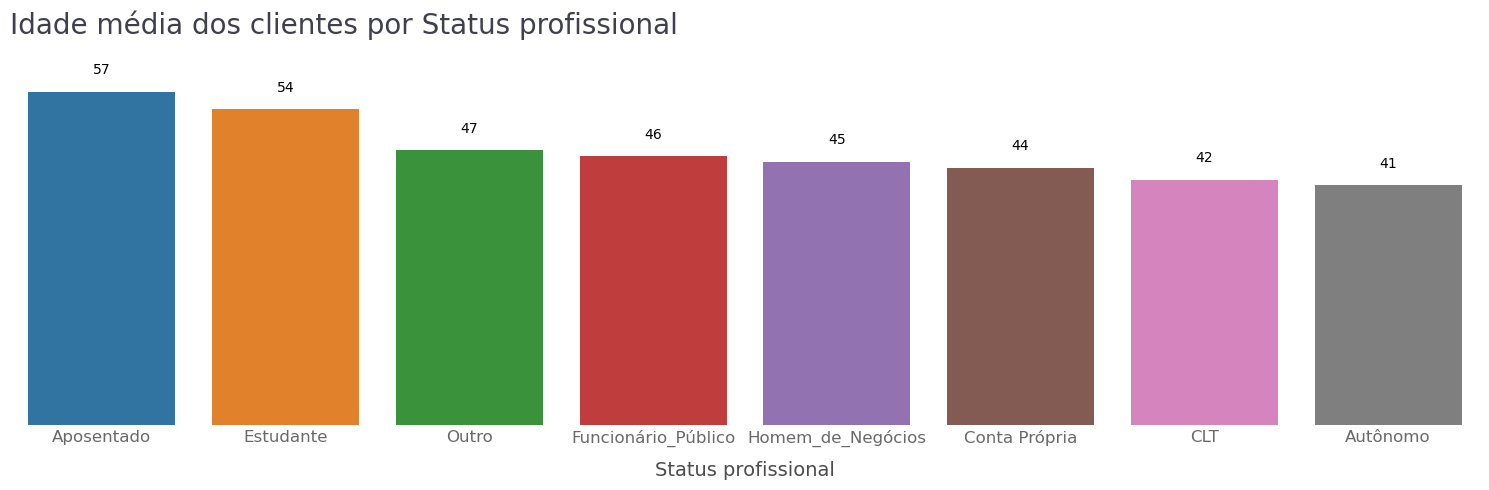

In [234]:
#criando o DataFrame
idade_clientes = pd.DataFrame({'Status profissional':['Autônomo','Aposentado','CLT','Conta Própria','Outro','Homem_de_Negócios','Funcionário_Público','Estudante'], # Nome das frutas
                   'Idade':[41,57,42,44,47,45,46,54]})  # Idade média dos clientes por status profissional.


#ajustando a ordem do DataFrame
idade_clientes.sort_values(by='Idade', # ordenar pela quantidade
               ascending=False, # colocar na ordem contrária a ascendente (portanto, descendente <- maior para o menor)
               inplace=True, # atualizar o DataFrame com as mudanças
               ignore_index=True) #ignorar índice anterior

fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x='Status profissional',y='Idade',data=idade_clientes,ax=ax);
ax.set_frame_on(False)
ax.set_title('Idade média dos clientes por Status profissional', # texto do título
             loc='left', # posicionamento do título no Axes
             pad=30, # Distanciamento do título com outros objetos
             fontdict={'fontsize':20}, # Tamanho da fonte utilizado
             color='#3f3f4e') # cor da fonte em hexadecimal

#retirando o eixo y
ax.get_yaxis().set_visible(False) # retirando o eixo Y
#retirando os ticks do eixo x
ax.tick_params(axis='x', # escolhendo os ticks do eixo x
               length=0, # colocamos os ticks de tamanho zero, compare com os desenhos de cima
               labelsize=12, # tamanho da fonte para os eixos
               colors='dimgrey') # cor da fonte para o eixo x
#ajustando o título Regiões do eixo
ax.set_xlabel('Status profissional', # título que queremos colocar na parte horizontal (em baixo)
              labelpad=10, # distanciamento deste título com outros objetos
              fontdict={'fontsize':14}, # tamanho da fonte utilizado
              color='#4c4c4c') # cor da fonte em hexadecimal

#plotando o gráfico
plt.tight_layout();

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 3,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

* Clientes aposentados possuem a maior idade. Contudo, um fato interessante nessa base de dados é que em segundo lugar, está a categoria estudante com a maior idade média.

# 4. Conclusões

* O Estado com o maior número de clientes é São Paulo com 17864.


* Os clientes que mais compram são trabalhadores da modalidade CLT.


* A maioria dos clientes são do sexo feminino.


* A região que possui o maior número de clientes que visitam o site da empresa é a região Sudeste.


* Clientes aposentados possuem a maior idade. Contudo, um fato interessante nessa base de dados é que em segundo lugar, está a categoria estudante com a maior idade média.